### Imports

In [872]:
import numpy as np
import scipy
import sklearn as sk
import matplotlib.pyplot as plt
import math
from math import pi
from just_some_functions import *
from statistics import *

import gspread
from gspread import *
import pandas as pd

from oauth2client.service_account import ServiceAccountCredentials

import time
from datetime import *

import random

# from io import StringIO
# import requests


Need to run the cell below for the initial load of the data

In [917]:
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']

credentials = ServiceAccountCredentials.from_json_keyfile_name('json/dungeon runner-6a51b68a1239.json', scope)

gspread_credentials = gspread.authorize(credentials)

expense_related_worksheet = gspread_credentials.open_by_key('1tKPle0EOUtjTcFtqLqHXcM_iPxlf3MV4RYHfi59d8k0') 

expense_categories = expense_related_worksheet.sheet1

work_hours_related_worksheet = gspread_credentials.open_by_key('1RdACxeor-Y4NZlmiAU1eQopvcU_I2J54KOpc2AWYfU8')

work_hours_categories = work_hours_related_worksheet.sheet1


#Place the related line below in all functions relating to retrieving data from the worksheets
#Commented here so they do not load every time I run this cell.

# expense_categories_data_frame = pd.DataFrame(expense_categories.get_all_records())
# work_hours_categories_data_frame = pd.DataFrame(work_hours_categories.get_all_records())

# line = requests.get("https://docs.google.com/spreadsheets/d/1GYQAl8UUgqTWFTPOzdc1ytrL5TrIoI67Yr4ThFAf_Fk/edit?usp=sharing")
# expense_data_set = line.content 
# expense_data_frame = pd.read_excel(StringIO(expense_data_set), index_col=1, parse_dates=['purchase_date'])


Each time must run the "get all records" function to pull new information

In [911]:
def load_expense_data():
    expense_categories_data_frame = pd.DataFrame(expense_categories.get_all_records())
    return expense_categories_data_frame.head()

def load_work_hours_data():
    work_hours_categories_data_frame = pd.DataFrame(work_hours_categories.get_all_records())
    return work_hours_categories_data_frame.head()

In [919]:
load_expense_data()

,,distance_from_home,merchant,merchant_category,purchase_amount,purchase_category,purchase_date,recurring,repurchase
0,,17,Publix,Grocer,$10.00,Food,31/12/2018,FALSE,TRUE
1,,,,,$0.00,,01/01/2019,FALSE,FALSE
2,,,,,$0.00,,02/01/2019,FALSE,FALSE
3,,,,,$0.00,,03/01/2019,FALSE,FALSE
4,,,,,$0.00,,04/01/2019,FALSE,FALSE


In [920]:
load_work_hours_data()

,actual_gross_annual_salary,actual_gross_weekly_salary,actual_net_annual_salary,approx_taxes_due,hourly_rate,hours_worked_daily,hours_worked_weekly,is_hourly_worker,is_salary_worker,pre_tax_deductiions,projected_gross_annual_salary,projected_net_annual_salary,time,week_of
0,"$43,513.60",$836.80,"$38,291.97","$5,221.63",$20.92,5.7143,40.0,TRUE,FALSE,300,"$43,513.60","$38,327.97",day,25/02/2019
1,"$43,513.60",$836.80,"$38,291.97","$5,221.63",$20.92,5.7143,40.0,TRUE,FALSE,0,"$43,513.60","$38,291.97",day,04/03/2019
2,"$43,513.60",$836.80,"$38,291.97","$5,221.63",$20.92,5.7143,40.0,TRUE,FALSE,0,"$43,513.60","$38,291.97",day,11/03/2019
3,"$43,513.60",$836.80,"$38,291.97","$5,221.63",$20.92,5.7143,40.0,TRUE,FALSE,0,"$43,513.60","$38,291.97",day,18/03/2019
4,"$43,513.60",$836.80,"$38,291.97","$5,221.63",$20.92,5.7143,40.0,TRUE,FALSE,0,"$43,513.60","$38,291.97",day,25/03/2019


In [784]:
avg_work_hrs_yr = 40 * 52
#print(avg_work_hrs_yr)

In [785]:
# hours = pd.readcsv('work_hours.csv')
# hr_per_week = pd.readcsv('work_week.csv')

# set hourly rate
# rates = pd.readcsv('hourly_rate.csv')

# deduction = pd.readcsv('deductions.csv')

hours = np.loadtxt("work_hours.txt")
hours_per_week = np.loadtxt("work_week.txt")
hourly_rates = np.loadtxt("hourly_rate.txt")
pre_tax_deduction = np.loadtxt("pre_tax_deductions.txt")
# salary = np.loadtxt("annual_salary.txt")

In [786]:
hours_worked_so_far = []
def weeks_worked(): 
    for i in hours:
        if i != 0:
            hours_worked_so_far.append(i)
    return len(hours_worked_so_far)

#print(weeks_worked())

### Deductions

##### Need to make updatable via outside txt file: DONE

In [787]:
def marital_status(string):
    pass

In [788]:
def deductions_from_taxable_income():
    for item in pre_tax_deductions:
        pass #increases the total amount to be deducted by the new item.

In [789]:
# tax_brackets = pd.read_excel("tax_brackets.xlsx")
# Use the above to update the bracket estimation

def tax_bracket_estimation(total_gross_income):
    if 0.00 < total_gross_income <= 9700:
        tax_bracket = (total_gross_income - deductions()) * 0.10
        tax_bracket = round(tax_bracket, 2)
        return tax_bracket
    elif 9700 < total_gross_income <= 39475:
        tax_bracket = (total_gross_income - marital_status() - deductions()) * 0.12
        tax_bracket = round(tax_bracket, 2)
        return tax_bracket
    elif 39475 < total_gross_income <= 84200:
        tax_bracket = (total_gross_income - marital_status() - deductions()) * 0.22
        tax_bracket = round(tax_bracket, 2)
        return tax_bracket
    elif 84200 < total_gross_income <= 160725:
        tax_bracket = (total_gross_income - marital_status() - deductions()) * 0.24
        tax_bracket = round(tax_bracket, 2)
        return tax_bracket
    elif 160725 < total_gross_income < 204100:
        tax_bracket = (total_gross_income - marital_status() - deductions()) * 0.32
        tax_bracket = round(tax_bracket, 2)
        return tax_bracket
    elif 204100 < total_gross_income < 510300:
        tax_bracket = (total_gross_income - marital_status() - deductions()) * 0.35
        tax_bracket = round(tax_bracket, 2)
        return tax_bracket
    else:
        tax_bracket = (total_gross_income - marital_status() - deductions()) * 0.37
        tax_bracket = round(tax_bracket, 2)
        return tax_bracket

### Compute gross income

###### temporary test values

In [790]:
#hours = 40
#hourly_rates = 20.92
#pre_tax_deductions = 300

monthly_wage = sum(hours) * hourly_rates
#Bug in weeks_worked() that causes it to keep counting

#print(sum(hours))
#print(hourly_rates)
#print(monthly_wage)

###### end temporary test values

In [791]:
def total_gross_income():
    total_gross_income = np.sum(wage) - 40 * hourly_rates
    return total_gross_income

#print(wage)
#print(total_gross_income())

##### Pay Period Cycling

In [792]:
def awaiting_next_pay_period(pay_schedule):
    # sleep(seconds per minute * minutes per hour * hours per day * days per week * weeks per period)
    if pay_schedule == 1:
        time.sleep(60*60*24*7*1)
        wage.append(hours*rates)
        
    elif pay_schedule == 2:
        time.sleep(60*60*24*7*2)
        wage.append(hours*rates)
    
    elif pay_schedule == 3:
        time.sleep(60*60*24*7*3)
        wage.append(hours*rates)
    
    elif pay_schedule == 4:
        time.sleep(60*60*24*7*4)
        wage.append(hours*rates)
        
#TODO update for a "twice per month" setting to include those who would be paid on two fixed calendar dates

### Projected Annual Income

In [793]:
tax_bracket = 0.22

In [794]:
projected_annual_income = (avg_work_hrs_yr * hourly_rates) - tax_bracket * (avg_work_hrs_yr * hourly_rates) 

# projected_annual_income = projected_annual_income - tax_deduction * projected_annual_income
#print(projected_annual_income)

### Compute net income

In [795]:
net_income_01 = total_gross_income() - tax_bracket * total_gross_income()
#print(net_income_01)

### Compute expenses

In [796]:
# bills_01 = pd.read_excel('bills01.xlsx')

#bills_01 = np.matrix(np.loadtxt('bills_1.txt'))
bills_01 = np.loadtxt('bills_1.txt')

expenses_01 = np.sum(bills_01)

#print(expenses_01)
#print(bills_01.shape)

### Compute remaining income

In [797]:
remaining_income = net_income_01 - expenses_01

remaining_annual_income = projected_annual_income - remaining_income

#print(remaining_income)
#print(remaining_annual_income)

### Linear regression plot

In [806]:
j = np.array(bills_01).shape[0]
i = np.arange(j)
#m = np.sum((i - np.sum(i)/len(i)) * bills_01) / np.sum((i - np.sum(i)/len(i)) ** 2)
#c = np.sum(bills_01)/len(bills_01) #- m * np.sum(i)/len(i)

#print(j)
#print(i)
#print(bills_01.shape)
#print(c)

In [837]:

# Average spending per data point in bills
# TODO convert to average spending per day
average_spent_per_day = np.sum(bills_01)/len(bills_01)
print("The average spent per day was: ", average_spent_per_day)

# General disparity
despair_ity = (projected_annual_income - remaining_income) / projected_annual_income
print("With disparity: ", despair_ity)

The average spent per day was:  44.04630434782609
With mean:  44.04630434782609  and standard deviation:  95.50574000030184


Start temp/test data

In [808]:
import random

def temp_data(number_of_points, bias, variance):
    x = np.zeros(shape=(number_of_points, 2))
    y = np.zeros(shape=number_of_points)
    # basically a straight line
    for i in range(0, number_of_points):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

temp_i, temp_bills = temp_data(100, 5, 100)


End temp/test data

In [852]:
def regression_plot(x, y):
    plt.plot(x, y.T, 'rx')
    plt.plot(x, y.T)

    m, c = np.polyfit(x, y.T, 1)

    #fitting function needs a 1d polynomial
    #fitting_function = np.poly1d((np.polyfit(i, bills_01.T, 1)))

    plt.plot(m*i + c)

    #plt.plot(i, bills_01, 'yo', i, fitting_function(i), '--k')
    #plt.xlim(0, 5)
    #plt.ylim(0, 12)

    #Plotting some test data since the current txt files are empty
    #temp_i = temp_i
    #temp_m = np.sum(np.matrix(temp_i - np.average(temp_i)).T * np.matrix(temp_bills).T) / np.sum((temp_i - np.average(temp_i)) ** 2)
    #temp_c = np.average(temp_bills) - temp_m * np.average(temp_i)

    #plt.plot(temp_i, temp_bills)
    #plt.plot(temp_m*temp_i + temp_c)

    plt.xlabel('day number')
    plt.ylabel('amount spent per day')
    plt.show()



In [854]:
def analytics_text(data):
    print("With mean: ", mean(data), " and standard deviation: ", stdev(data))
    print("With this trend, your expenses could possible increase to {:0.2f} at your next purchase.".format(mean(data)+stdev(data)))
    print("However, since your current savings are at {}, please try and be reasonable about spending.".format(remaining_income))

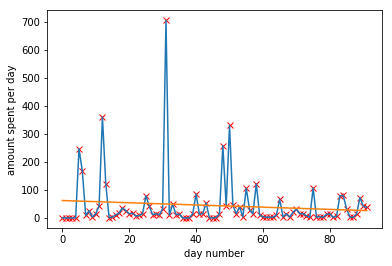

In [855]:
regression_plot(i, bills_01)

In [856]:
analytics_text(bills_01)

With mean:  44.04630434782609  and standard deviation:  95.50574000030184
With this trend, your expenses could possible increase to 139.55 at your next purchase.
However, since your current savings are at -1441.444, please try and be reasonable about spending.


### View the budget

In [811]:
# Plot Data
def budget_image():
    # visual_expense = pd.read_excel("bills_01.xlsx")
    # Change "person 1" and "person 2" to draw names from spreadsheet
    # data = pd.DataFrame([visual_expense], index = ["person 1", "person 2"])
    
    features = list(data)
    number_of_features = len(features)
    
    values_for_person_one = data.iloc[0].tolist()
    values_for_person_one += values_for_person_one[:1]
    
    values_for_person_two = data.iloc[1].tolist()
    values_for_person_two += values_for_person_two[:1]
    
    angles = [n / float(number_of_features) * 2 * pi for n in range(number_of_features)]
    angles += angles[:1]
    
    ax = plt.subplot(111, polar = True)
    
    plt.xticks(angles[:-1], features)
    
    ax.plot(angles, values_for_person_one)
    ax.plot(angles, values_for_person_two)
    
    ax.fill(angles, values_for_person_one, '00e5ee', alpha = 0.1)
    axis.set_title("Person 1")
    plt.show()
    
    ax.fill(angles, values_for_person_two, 'b57edc', alpha = 0.1)
    axis.set_title("Person 2")
    plt.show()
    
    
#    Pie chart
#    labels = 'Rent', 'Water', 'Power', 'Retirement', 'Health Care', 'Car Insurance', 'Rent Insurance', 'PAY PERIOD'
#    sizes = [rental, wat_bill, pow_bill, ret_ded, health_ded, car_ins, rent_ins, PAY_PERIOD()]
#    explode = (0, 0, 0, 0, 0, 0, 0, 0.1)

#    fig1, ax1 = plt.subplots()
#    ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.2f%%',
#            shadow = True, startangle = 90)
#    ax1.axis('equal') # aspect ratio to make it a circle
#    plt.show()

##### Budget view function

In [812]:
def view_budget(person, data):    
    
    
#   features = list(pd.DataFrame([pd.read_excel("bills_01.xlsx")], index = ["person 1", "person 2"]))
    features = ["Rent", "Water", "Power", "Entertainment", "Health Care", "Insurance: Car", "Insurance: Housing", "Else"]
    features_of_interest = len(features)
    
    data += data [:1]
    
    angles = [n / (features_of_interest) * 2 * pi for n in range(features_of_interest)]
    angles += angles [:1]
    
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1], features)
    ax.plot(angles, data)
    ax.fill(angles, data, 'blue', alpha=0.1)

    ax.set_title(person)
    plt.show()
    
# features = list(pd.DataFrame([pd.read_excel("bills_01.xlsx")], index = ["person 1", "person 2"]))
# features = ["Rent", "Water", "Power", "Entertainment", "Health Care", "Insurance: Car", "Insurance: Housing", "Else"]
# features_of_interest = len(features) + 1
# print(features_of_interest)    

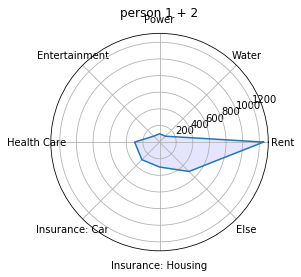

In [813]:
view_budget("person 1 + 2", [1250, 100, 100, 100, 300, 300, 300, 500])

TypeError: unsupported operand type(s) for //: 'str' and 'int'

***

Begin back propagation...or not since it's just a more complicated version of gradient descent

In [814]:
sigma = lambda z : 1 / (1 + np.exp(-z))
d_sigma = lambda z : np.cosh(z/2)**(-2) / 4

#initialize network structure and clear past trainings
def reset_network (n1 = 6, n2 = 7, random=np.random) :
    global W1, W2, W3, b1, b2, b3
    W1 = random.randn(n1, 1) / 2
    W2 = random.randn(n2, n1) / 2
    W3 = random.randn(2, n2) / 2
    b1 = random.randn(n1, 1) / 2
    b2 = random.randn(n2, 1) / 2
    b3 = random.randn(2, 1) / 2

#generate the network
def network_function(a0):
    z1 = W1 @ a0 + b1
    a1 = sigma(z1)
    z2 = W2 @ a1 + b2
    a2 = sigma(z2)
    z3 = W3 @ a2 + b3
    a3 = sigma(z3)
    return a0, z1, a1, z2, a2, z3, a3

#Cost function
def cost(x, y) :
    return np.linalg.norm(network_function(x)[-1] - y)**2 / x.size

#first node
def J_W3 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = J @ a2.T / x.size
    return J

def J_b3 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y) 
    J = J * d_sigma(z3)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

#second node
def J_W2 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)    
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = J @ a1.T / x.size
    return J

def J_b2 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

#third node
def J_W1 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = (J.T @ W2).T
    J = J * d_sigma(z1)
    J = J @ a0.T / x.size
    return J

def J_b1 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = (J.T @ W2).T
    J = J * d_sigma(z1)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

Begin machine learning prediction MK II: SGD Classification

In [819]:
from sklearn.linear_model import SGDClassifier

# classifier = SGDClassifier(loss="L2", penalty="none", max_iter=10)
#L2 norm not supported

###### Begin prediction MK I: gradient descent

Notes:
    Python doesn't immediately intepret the full set of dimensions for a multidimensional array if one of the the dimentions is 1.
     Culprit 1: So must cast as np.matrix to compensate.
     Culprit 2: Not able to handle very large numbers. So we can import Decimal.
     Culprit 3: Possibly using np.power() might bypass computational error
     Culprit 4: np.square also induces computational error
     Culprit 5: Cross products don't work since they will result in an orthogonal vector
     Culprit 6: np.vectorize ????
     Culprit 7: reduce(fxn, array)
     Culprit 8: Fuck it. Run without any instances of np.matrix.

In [820]:
x = np.matrix('1, 2; 3, 4; 5, 0')
squarer = lambda t: t ** 2
#vfunc = np.vectorize(squarer)
#vfunc(x)

In [821]:
from functools import reduce
def my_reduce(x, y):
    length=len(x[0])-1
    newY = y**2
    # print('x', 
    # x,
    # 'beg len',
    # len(x[0]),
    # 'end len',
    # x[0][len(x[0])-1]
    # ,'y', y)


    # 1) component wise squaring
    x[0].append(newY)
    # 2) dot product for each value.
    x[1] = x[0][length]+newY
    # 3) delta of component wise by dot product.
    x[2] = (x[1] - x[0][length+1])

    return x

print(reduce(my_reduce, [1, 2, 3], [[0],0,0]))

[[0, 1, 4, 9], 13, 4]


In [824]:
from decimal import Decimal
from functools import reduce

# def squared(x):
#     return x**2

def gradientDescent(x, y, theta, alpha, N, iterations):
    for iter in range(iterations):
        x_transpose = x.transpose()
        hypothesis = np.dot(x, theta)
        squared_errors = (hypothesis - y) **2
        cost = squared_errors / (2 * N)
#        print("At iteration {}, the cost is {}".format(iter, cost))

        gradient = np.dot(x, squared_errors) / N
        # update theta
        theta = theta - alpha * gradient
    return theta

# print(type(i))
# print(type(bills_01))

# print((np.dot(i, theta) - bills_01).shape)
# print((bills_01).shape)
# print(np.matrix(i))


N = j
#temp_N = len(temp_i)
# iterations = 10000
# alpha = 0.005

theta = np.ones(N)
# temp_theta = np.ones(temp_N)
theta = gradientDescent(i, bills_01, theta, alpha, j, iterations)

# Determine the capacity for what can be done in the vein of gradient descent on cost here

/usr/local/conda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in square
  # This is added back by InteractiveShellApp.init_path()
